# Creating Interactive and Static Charts with Plotly [Work in progress]

By Kenneth Burchfiel

Released under the MIT License

In this section, we'll learn how to use the Plotly library to create bar, line, and scatter graphs of NVCU survey data. We'll then save these charts to both interactive HTML files and static .png files.

When I was first learning Python, I mainly used Matplotlib for my charts. Matplotlib is a great library as well, but I switched over to Plotly for as my default chart library for several reasons:

1. Plotly makes it easy to produce both interactive and static versions of a given chart. These interactive versions, which work great on websites (but can also be opened as standalone HTML files), allow users to access more information about the data than they could via an image of the chart alone.

2. Plotly integrates very well with Dash, a Python library that allows you to build interactive web apps within Python. (A later section of Python for Nonprofits will demonstrate how to build both simple and more complex Dash web apps).

3. My general sense is that Plotly requires less code to produce a desired result than does Matplotlib, although I don't have any hard data on which to base this point.


Note: this script will create graphs using [Plotly Express](https://plotly.com/python/plotly-express/). This version of Plotly allows you to create detailed charts with relatively few lines of code. For more complex charts, you may need to instead work with *graph objects*, which offer more customizability: however, I'd recommend using Plotly Express code within your scripts when possible. After all, as the page linked to above notes, "Any figure created in a single function call with Plotly Express could be created using graph objects alone, but with between 5 and 100 times more code."

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

show_html_output = False # If set to False, the script will not attempt to 
# display HTML output; instead, it will explain that this output can be viewed
# by downloading the script and then running it offline. (GitHub may not always
# display HTML charts and maps, so including this variable helps me preview
# what the script's output on GitHub will look like.)
no_html_output_message = 'To view this HTML output, download the script, set \
show_html_output to True, and run it offline.'

from IPython.display import Image # Based on 
# a StackOverflow answer from 'zach' at
# https://stackoverflow.com/a/11855133/13097194 .

# Creating bar graphs

(For more details on bar charts in Plotly, consult the [px.bar() documentation](https://plotly.com/python/bar-charts/).)

In order to create bar graphs of NVCU survey data, we can import the pivot tables of this data created within our Descriptive Stats section, then feed them into our Plotly graphing script.

In [2]:
df_survey_results_by_college_long = pd.read_csv(
    '../Descriptive_Stats/survey_results_by_college_long.csv')
# Capitalizing all column names will allow our charts' x and y axis labels 
# to appear capitalized by default.
df_survey_results_by_college_long.columns = [
    column.title() for column in 
    df_survey_results_by_college_long.columns]
df_survey_results_by_college_long.head()

,Starting_Year,College,Season,Score
0,2023,STB,Fall,69.797119
1,2023,STB,Spring,67.077551
2,2023,STB,Winter,64.472207
3,2023,STC,Fall,69.568665
4,2023,STC,Spring,66.911444


## Simple bar graphs

We'll begin by creating a bar chart that shows spring survey results by college:

In [3]:
fig_spring_survey_results_by_college = px.bar(
    df_survey_results_by_college_long.query(
    "Season == 'Spring'"), x = 'College', y = 'Score',
      title = 'Spring Survey Scores by College',
      color = 'College', text_auto = '.0f')
# See https://plotly.com/python/bar-charts/

# The text_auto argument allows you to easily add bar labels using 
# a format of your choice. '.0f' rounds labels to the nearest integers;
# to show values with 2 decimal points, use '.2f' instead. You can also
# show percentage figures by replacing 'f' with '%'.



(fig_spring_survey_results_by_college if show_html_output == True 
 else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

Plotly charts are generated in HTML format by default; this allows them to offer a range of interactive features, such as tooltips (extra information that appears when you hover over a chart element) and panning/zooming options. You can also filter the x axis elements by clicking once on a legend element to remove it and clicking twice to keep only that element. 

These interactive charts can easily be saved as HTML files via the write_html() function:

In [4]:
fig_spring_survey_results_by_college.write_html(
    'output/spring_results_by_college.html')

This .html file can now be opened in a web browser as a standalone document or embedded in a website for public display.

However, it's also convenient to create static copies of these charts (e.g. for use within a slide deck or a web page that doesn't allow certain HTML elements to be displayed). Thankfully, it's very simple to create static copies of these charts. We simply need to call write_image() instead of write_html().

However, the default settings for write_image() produce, in my view, a relatively blurry image that isn't suitable for presenting. Therefore, the following cell includes three optional parameters for write_image: `height`, `width`, and `scale`. The settings shown below produce a chart with 4K resolution (3840 * 2160 pixels) whose text is also large enough to be easily readable.

In [5]:
height = 540
aspect_ratio = 16/9
width = height * aspect_ratio
scale = 2160 / height

# The above approach allows the height setting to automatically adjust
# the width and scale setting while preserving a resolution of 3840 * 2160.

# The chart's height and width (in pixels) will be height * scale 
# and width * scale, respectively. Smaller height and width values will 
# result in larger (and thus more readable) text, but in order to keep 
# the resulting file sharp, I increased the scale to compensate. For instance,
# a height of 540 will result in a scale of 4 (2160 / 540); a height of 360
# will result in a scale of 6.

# You may want to experiment with different settings in order to find the 
# result that best meets your needs.
# The 16/9 aspect ratio is used in many modern TVs and monitors, thus 
# making it ideal for full-screen displays of charts.

print("Height:",height, "\nWidth:", width, "\nScale:",scale)

fig_spring_survey_results_by_college.write_image(
    'output/spring_results_by_college.png', height = height, 
width = width, scale = scale)
# For more information about write_image, see:
# https://plotly.com/python-api-reference/generated/plotly.io.write_image.html

Height: 540 
Width: 960.0 
Scale: 4.0


Note: in order for the above code to work, you'll most likely need to have installed the kaleido library. When using the conda package manager on Windows, I've found that I've needed to request version 0.1.0 of kaleido when installing the library (e.g. by calling `conda install python-kaleido=0.1.0` within my command prompt); this is because the later version appears to cause image generation scripts to hang indefinitely. (I found this solution via [this GitHub post](https://github.com/plotly/Kaleido/issues/134#issuecomment-1781183798).) 

I haven't encountered this problem on Linux, so on that OS (and presumably on Mac), `conda install python-kaleido` should work fine. 

The kaleido library makes creating static versions of HTML-based Plotly graphs very straightforward. In the Mapping section of Python for Nonprofits, we'll go over a more manual approach for creating static versions of HTML files (as that section will utilize a library that doesn't yet have kaleido support).

To display this image within this notebook, we can call Image from IPython.display:

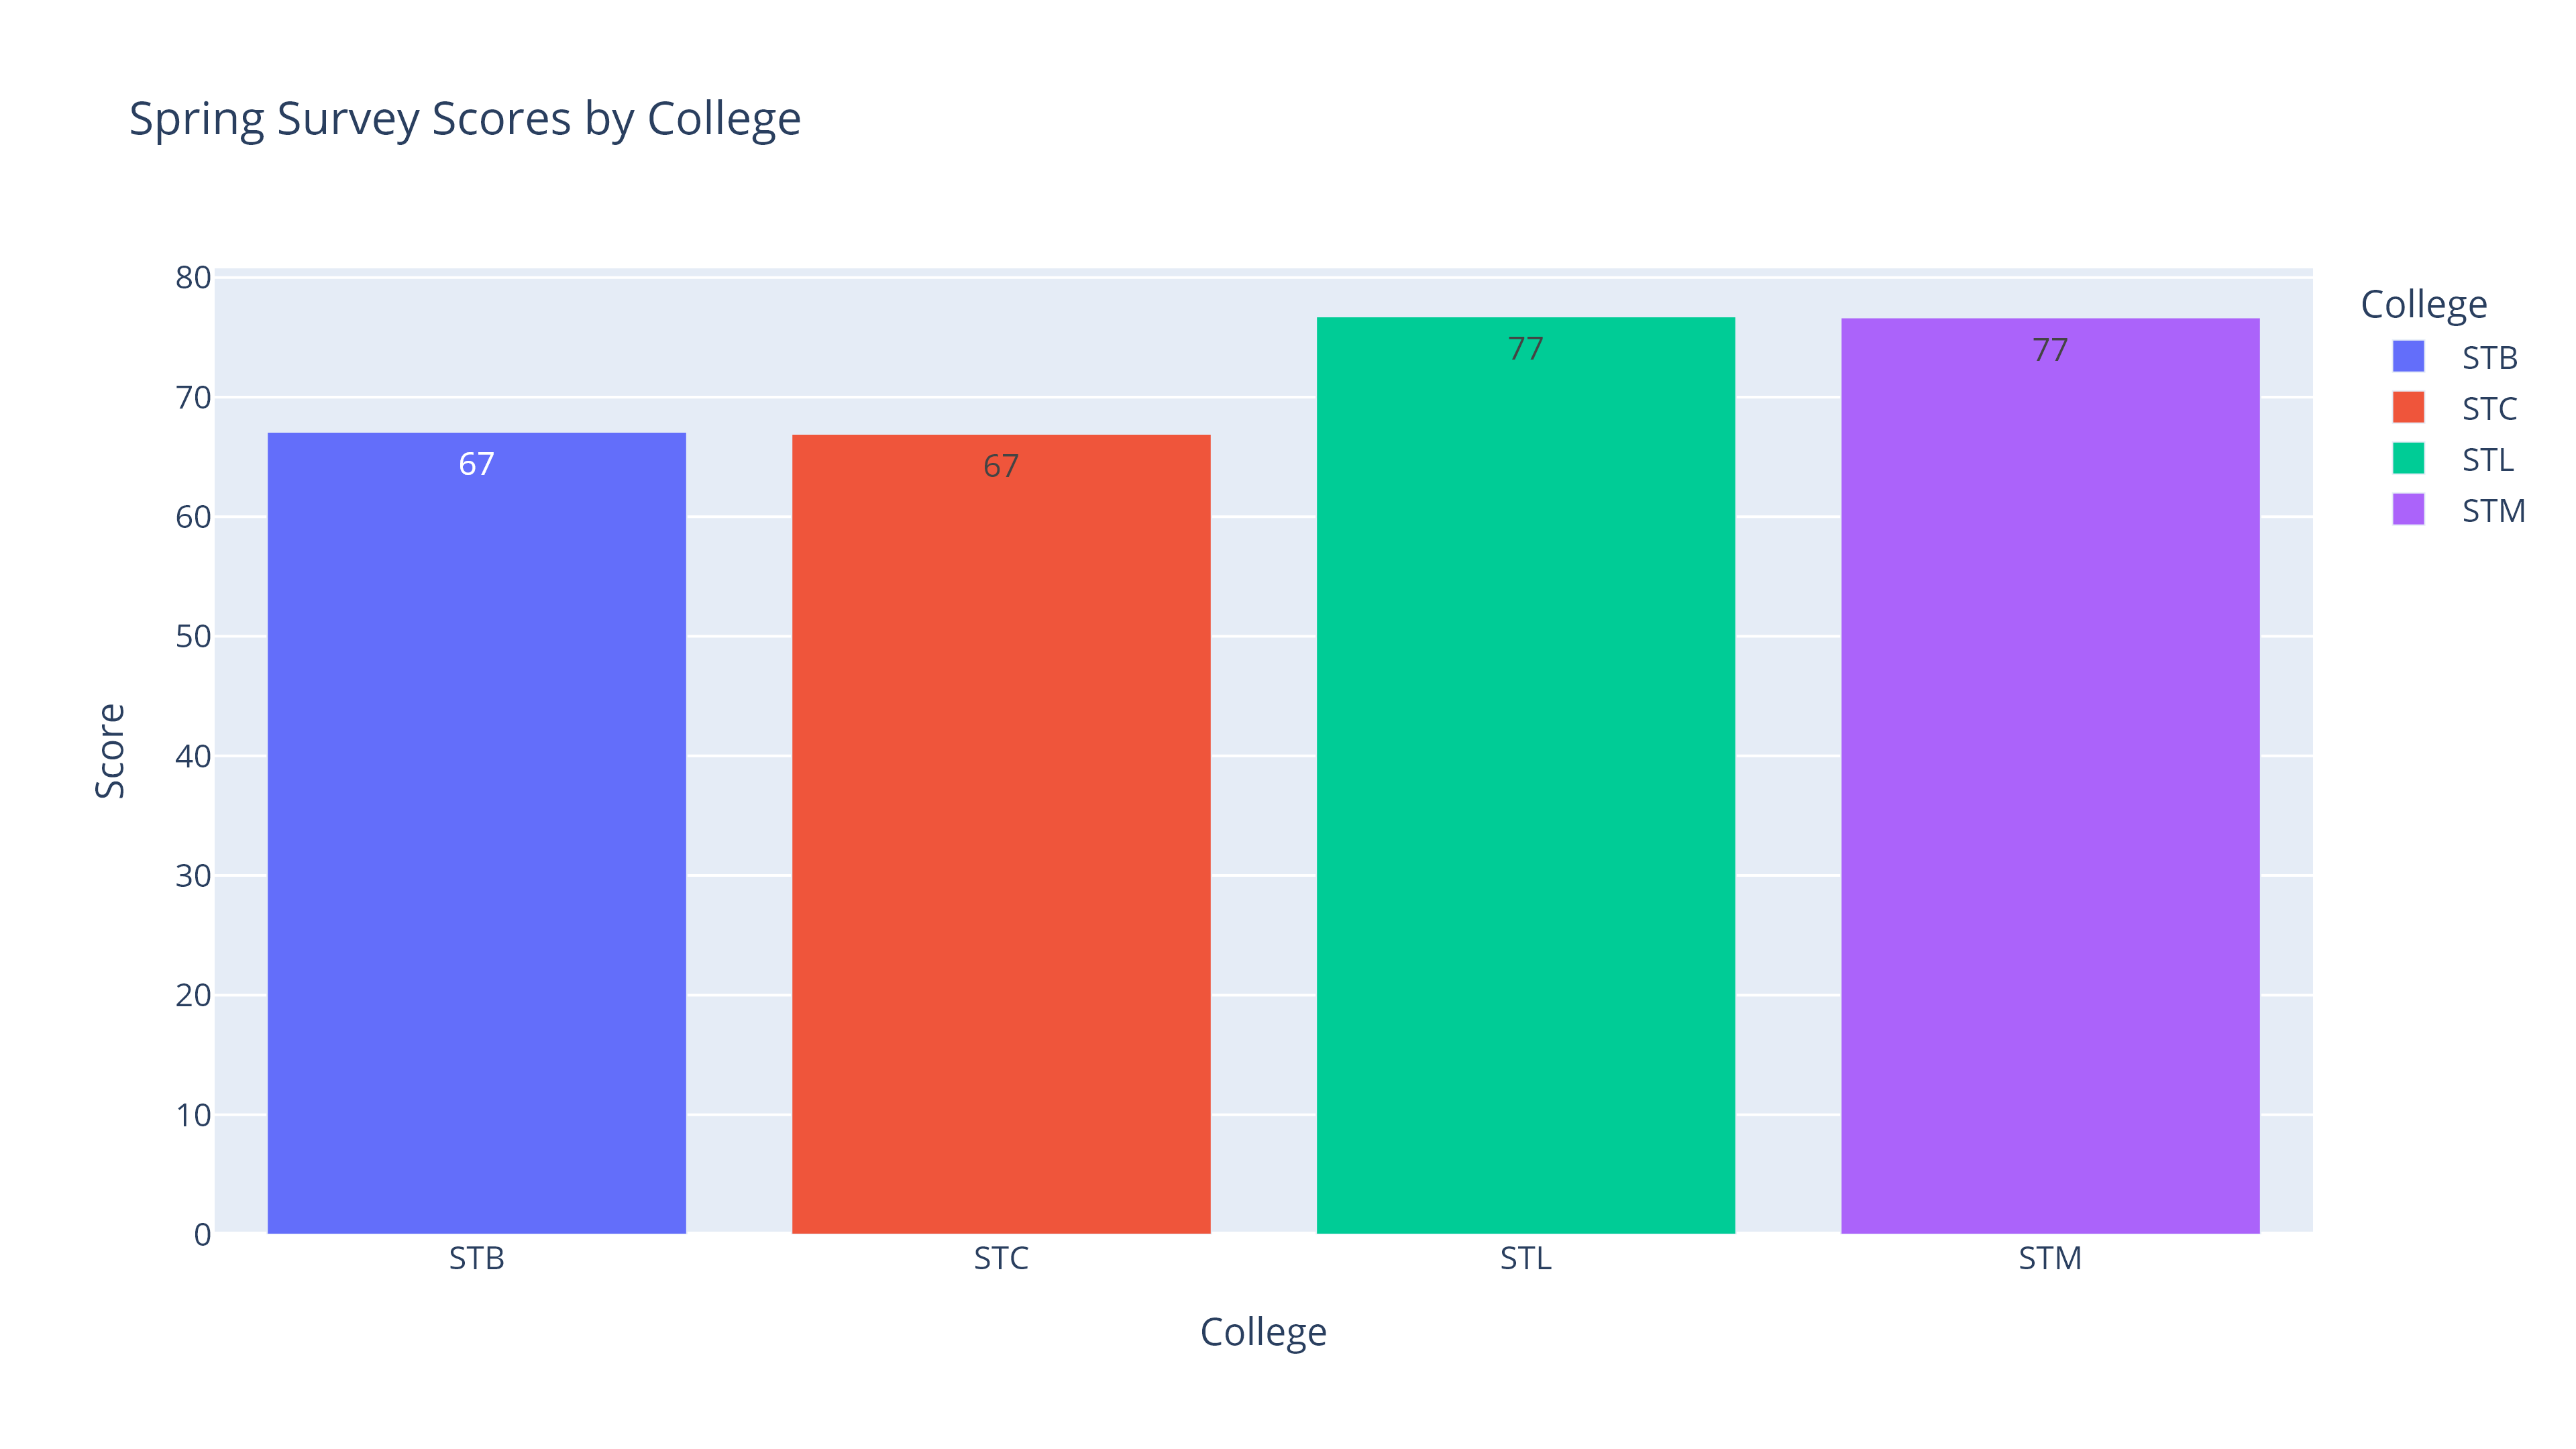

In [6]:
Image('output/spring_results_by_college.png', width = 720)
# Based on the StackOverflow answer from 'zach'
# at https://stackoverflow.com/a/11855133/13097194 ;
# See also:
# https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image

## Creating a function to simplify the process of saving and displaying charts

We can more easily save our Plotly charts to HTML and PNG files, then display a static copy of the output by creating a function that, given a filename and a figure, takes care of all three operations for us.

In [7]:
def write_html_and_image(fig, file_path, height, width, scale,
                        display_image = True, display_width = 720):
    '''This function saves the Plotly figure passed to 'fig' to the destination
    represented by 'file_path'. 'height', 'width', and 'scale' will get
    passed to the parameters of the same name within the write_image() call.
    Don't add .png or .html to the end of file_path; these will get added
    in automatically by the function.
    display_image: set to True to use IPython's Image() function to 
    return the static image created within the function. The width of this
    image will equal display_width.
    '''
    
    fig.write_html(file_path+'.html')
    fig.write_image(file_path+'.png', height = height, 
width = width, scale = scale)
    if display_image == True:
        return Image(file_path+'.png', width = display_width)

## More detailed bar graphs

The bar graph created above shows that STL and STM had better survey results than did STB and STC. However, NVCU's administrators would also want to know how each college's survey results changed over the course of the year. We can visualize these changes by adding 'season' as our argument for the `color` variable within `px.bar()`, thus creating a chart that shows separate color-coded bars for each college/season pair. (We'll also add `barmode = 'group'` in order to display grouped bars rather than stacked ones.)

### Sorting DataFrames using a custom key

Note that, because 'Spring' precedes 'Winter' alphabetically, these charts will show winter results before spring results by default. We can display them in chronological order instead by sorting our DataFrame to have winter rows precede spring ones. 

The easiest way to accomplish this sort would be to first add a separate 'season_sort_order' column that contains values of 0, 1, and 2 for 'Fall', 'Winter',' and 'Spring' rows, respectively. Once this column is in place, we could then sort the DataFrame by it. However, for demonstration purposes, the following cell shows how this sort can be accomplished without adding an additional column. The approach shown below relies on the `key` argument available within sort_values together with Pandas' map() function.

In [8]:
df_survey_results_by_college_long.sort_values(
    'Season', key = lambda col: col.map(
        {'Fall':0,'Winter':1,'Spring':2}), inplace = True)
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_survey_results_by_college_long

,Starting_Year,College,Season,Score
0,2023,STB,Fall,69.797119
3,2023,STC,Fall,69.568665
6,2023,STL,Fall,69.596675
9,2023,STM,Fall,69.735685
2,2023,STB,Winter,64.472207
5,2023,STC,Winter,64.081522
8,2023,STL,Winter,64.028346
11,2023,STM,Winter,64.184930
1,2023,STB,Spring,67.077551
4,2023,STC,Spring,66.911444


Now that the DataFrame is sorted correctly, we can create our grouped bar graph:

In [9]:
fig_survey_results_by_college_and_season = px.bar(
    df_survey_results_by_college_long, 
    x = 'College', y = 'Score', 
    title = 'Survey Scores by College and Season',
      color = 'Season', text_auto = '.0f', barmode = 'group')
(fig_survey_results_by_college_and_season if show_html_output == True 
 else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

Calling `write_html_and_image` to save static and interactive copies of this chart, then display the .png output:

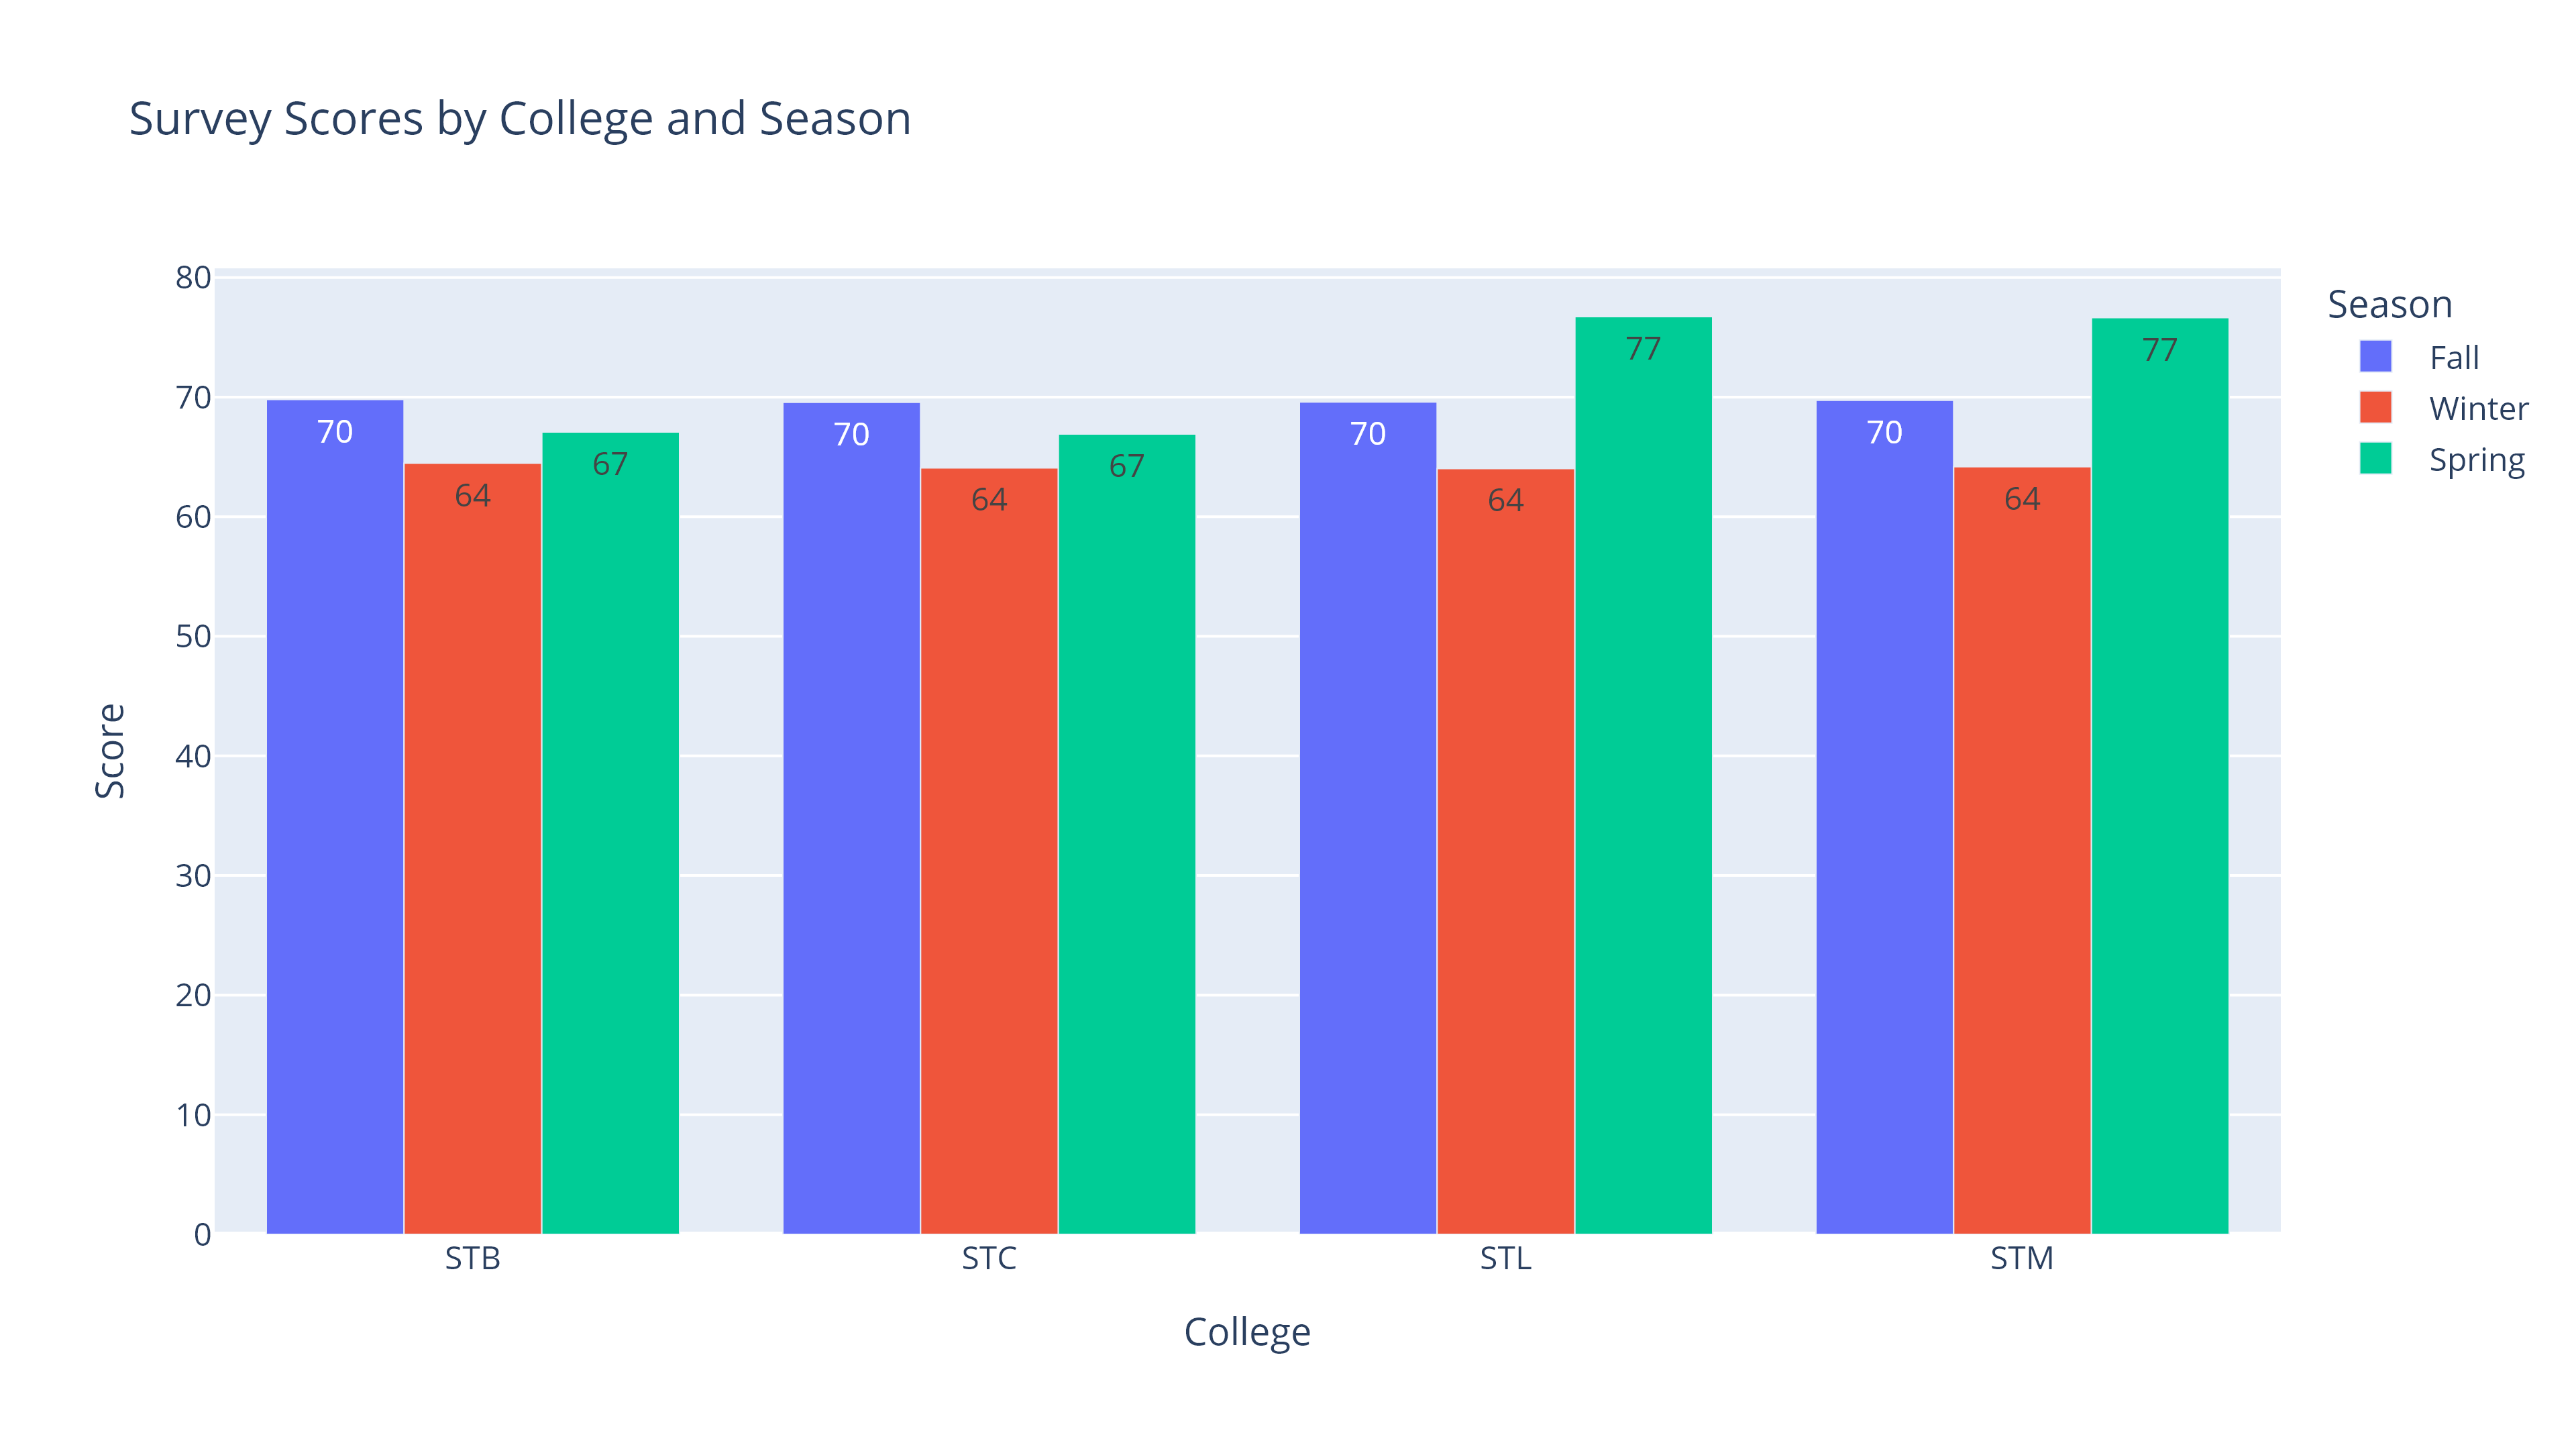

In [10]:
write_html_and_image(fig_survey_results_by_college_and_season,
                     'output/results_by_college_and_season',
                     height = height, width = width, scale = scale)

This graph clearly shows how each school's scores changed over time. However, in order to more easily compare results among schools for each season, we can switch the `x` and `color` arguments:

In [11]:
fig_survey_results_by_season_and_college = px.bar(
    df_survey_results_by_college_long, 
    x = 'Season', y = 'Score', 
    title = 'Survey Scores by Season and College',
      color = 'College', text_auto = '.0f', barmode = 'group')
(fig_survey_results_by_season_and_college if show_html_output == True 
 else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

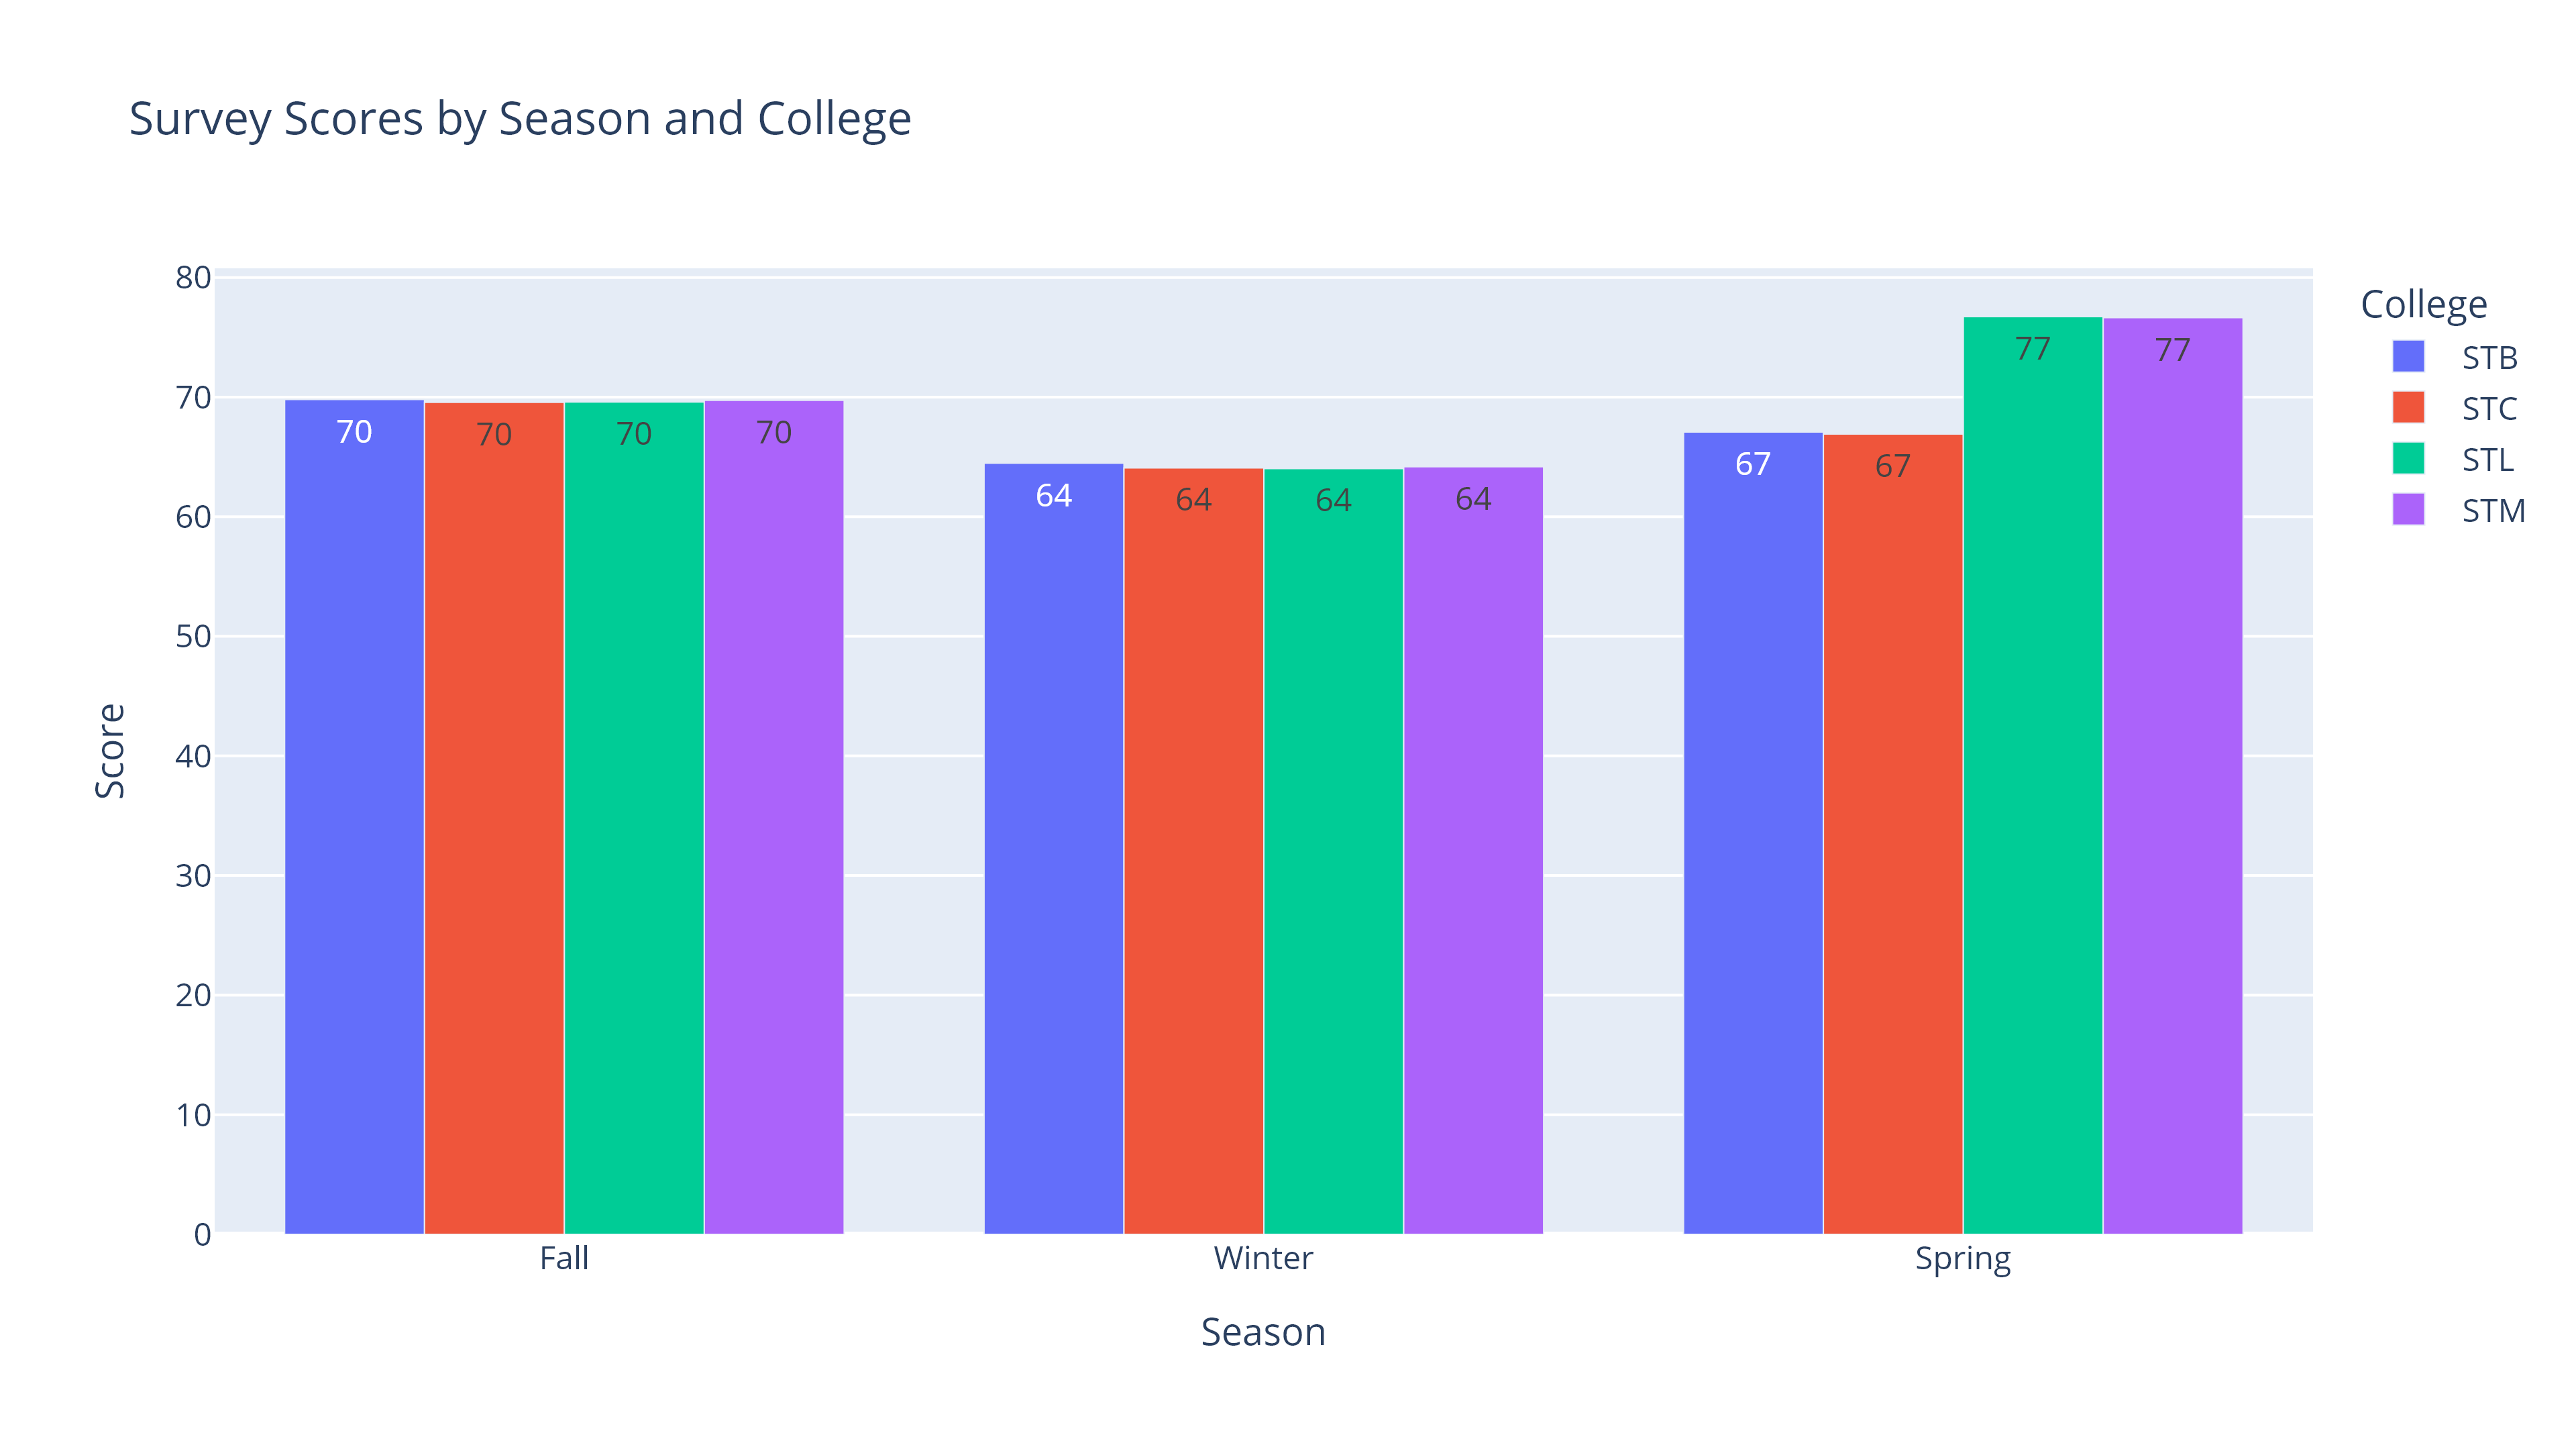

In [12]:
write_html_and_image(fig_survey_results_by_season_and_college,
                     'output/results_by_season_and_college',
                     height = height, width = width, scale = scale)

This chart demonstrates that each college had an average fall score around 70 followed by a 6-point drop to 64 during the winter. Although all colleges demonstrated growth from the fall to the winter, STL and STM clearly outperformed STB and STC (whose spring scores failed to match their fall scores).

## Graphing wide data

The previous two graphs used long-formatted data, meaning each row showed only one metric (in this case, one survey score). However, you may often encounter (or choose to create) tables in which multiple metrics are found within the same row. These datasets would be considered 'wide.' Here's an equivalent version of df_survey_results_by_college_long that uses a wide format:

In [13]:
df_survey_results_by_college_wide = pd.read_csv(
    '../Descriptive_Stats/survey_results_by_college_wide.csv')
df_survey_results_by_college_wide.columns = [
    column.title() for column in 
    df_survey_results_by_college_wide.columns]
df_survey_results_by_college_wide

,Starting_Year,College,Fall,Winter,Spring,Fall-Spring Change,Fall-Winter Change,Winter-Spring Change
0,2023,STB,69.797119,64.472207,67.077551,-2.719568,-5.324912,2.605344
1,2023,STC,69.568665,64.081522,66.911444,-2.657221,-5.487143,2.829922
2,2023,STL,69.596675,64.028346,76.727809,7.131134,-5.568328,12.699463
3,2023,STM,69.735685,64.184930,76.639004,6.903320,-5.550755,12.454074


This dataset contains the same score data as df_survey_results_by_college_long except that each college's Fall, Winter, and Spring scores are on the same row. (This makes calculating changes over time somewhat easier.)

Here's another look at df_survey_results_by_college_long for comparison:

In [14]:
df_survey_results_by_college_long

,Starting_Year,College,Season,Score
0,2023,STB,Fall,69.797119
3,2023,STC,Fall,69.568665
6,2023,STL,Fall,69.596675
9,2023,STM,Fall,69.735685
2,2023,STB,Winter,64.472207
5,2023,STC,Winter,64.081522
8,2023,STL,Winter,64.028346
11,2023,STM,Winter,64.184930
1,2023,STB,Spring,67.077551
4,2023,STC,Spring,66.911444


Plotly makes graphing wide data like this very straightforward. Instead of passing season to the 'color' argument (as we did with the long-formatted table), we can simply add each season to a list of y values:

In [15]:
fig_survey_results_by_college_and_season_wide = px.bar(
    df_survey_results_by_college_wide, x = 'College', 
       y = ['Fall', 'Winter', 'Spring'], barmode = 'group',
      title = 'Survey Scores by College and Season',
    text_auto = '.0f')
# See https://plotly.com/python/bar-charts/#bar-charts-with-wide-format-data

# Because we are displaying multiple y values rather than just one, Plotly
# sets the y axis and legend titles as 'value' and 'variables' by by default. 
# We can change these to 'Score' and 'Season', respectively, via the 
# following code:
fig_survey_results_by_college_and_season_wide.update_layout(
    yaxis_title = 'Score', legend_title = 'Season')
# https://plotly.com/python/figure-labels/

(fig_survey_results_by_college_and_season_wide if show_html_output == True 
 else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

As the following output shows, this graph is identical to fig_survey_results_by_college_and_season:

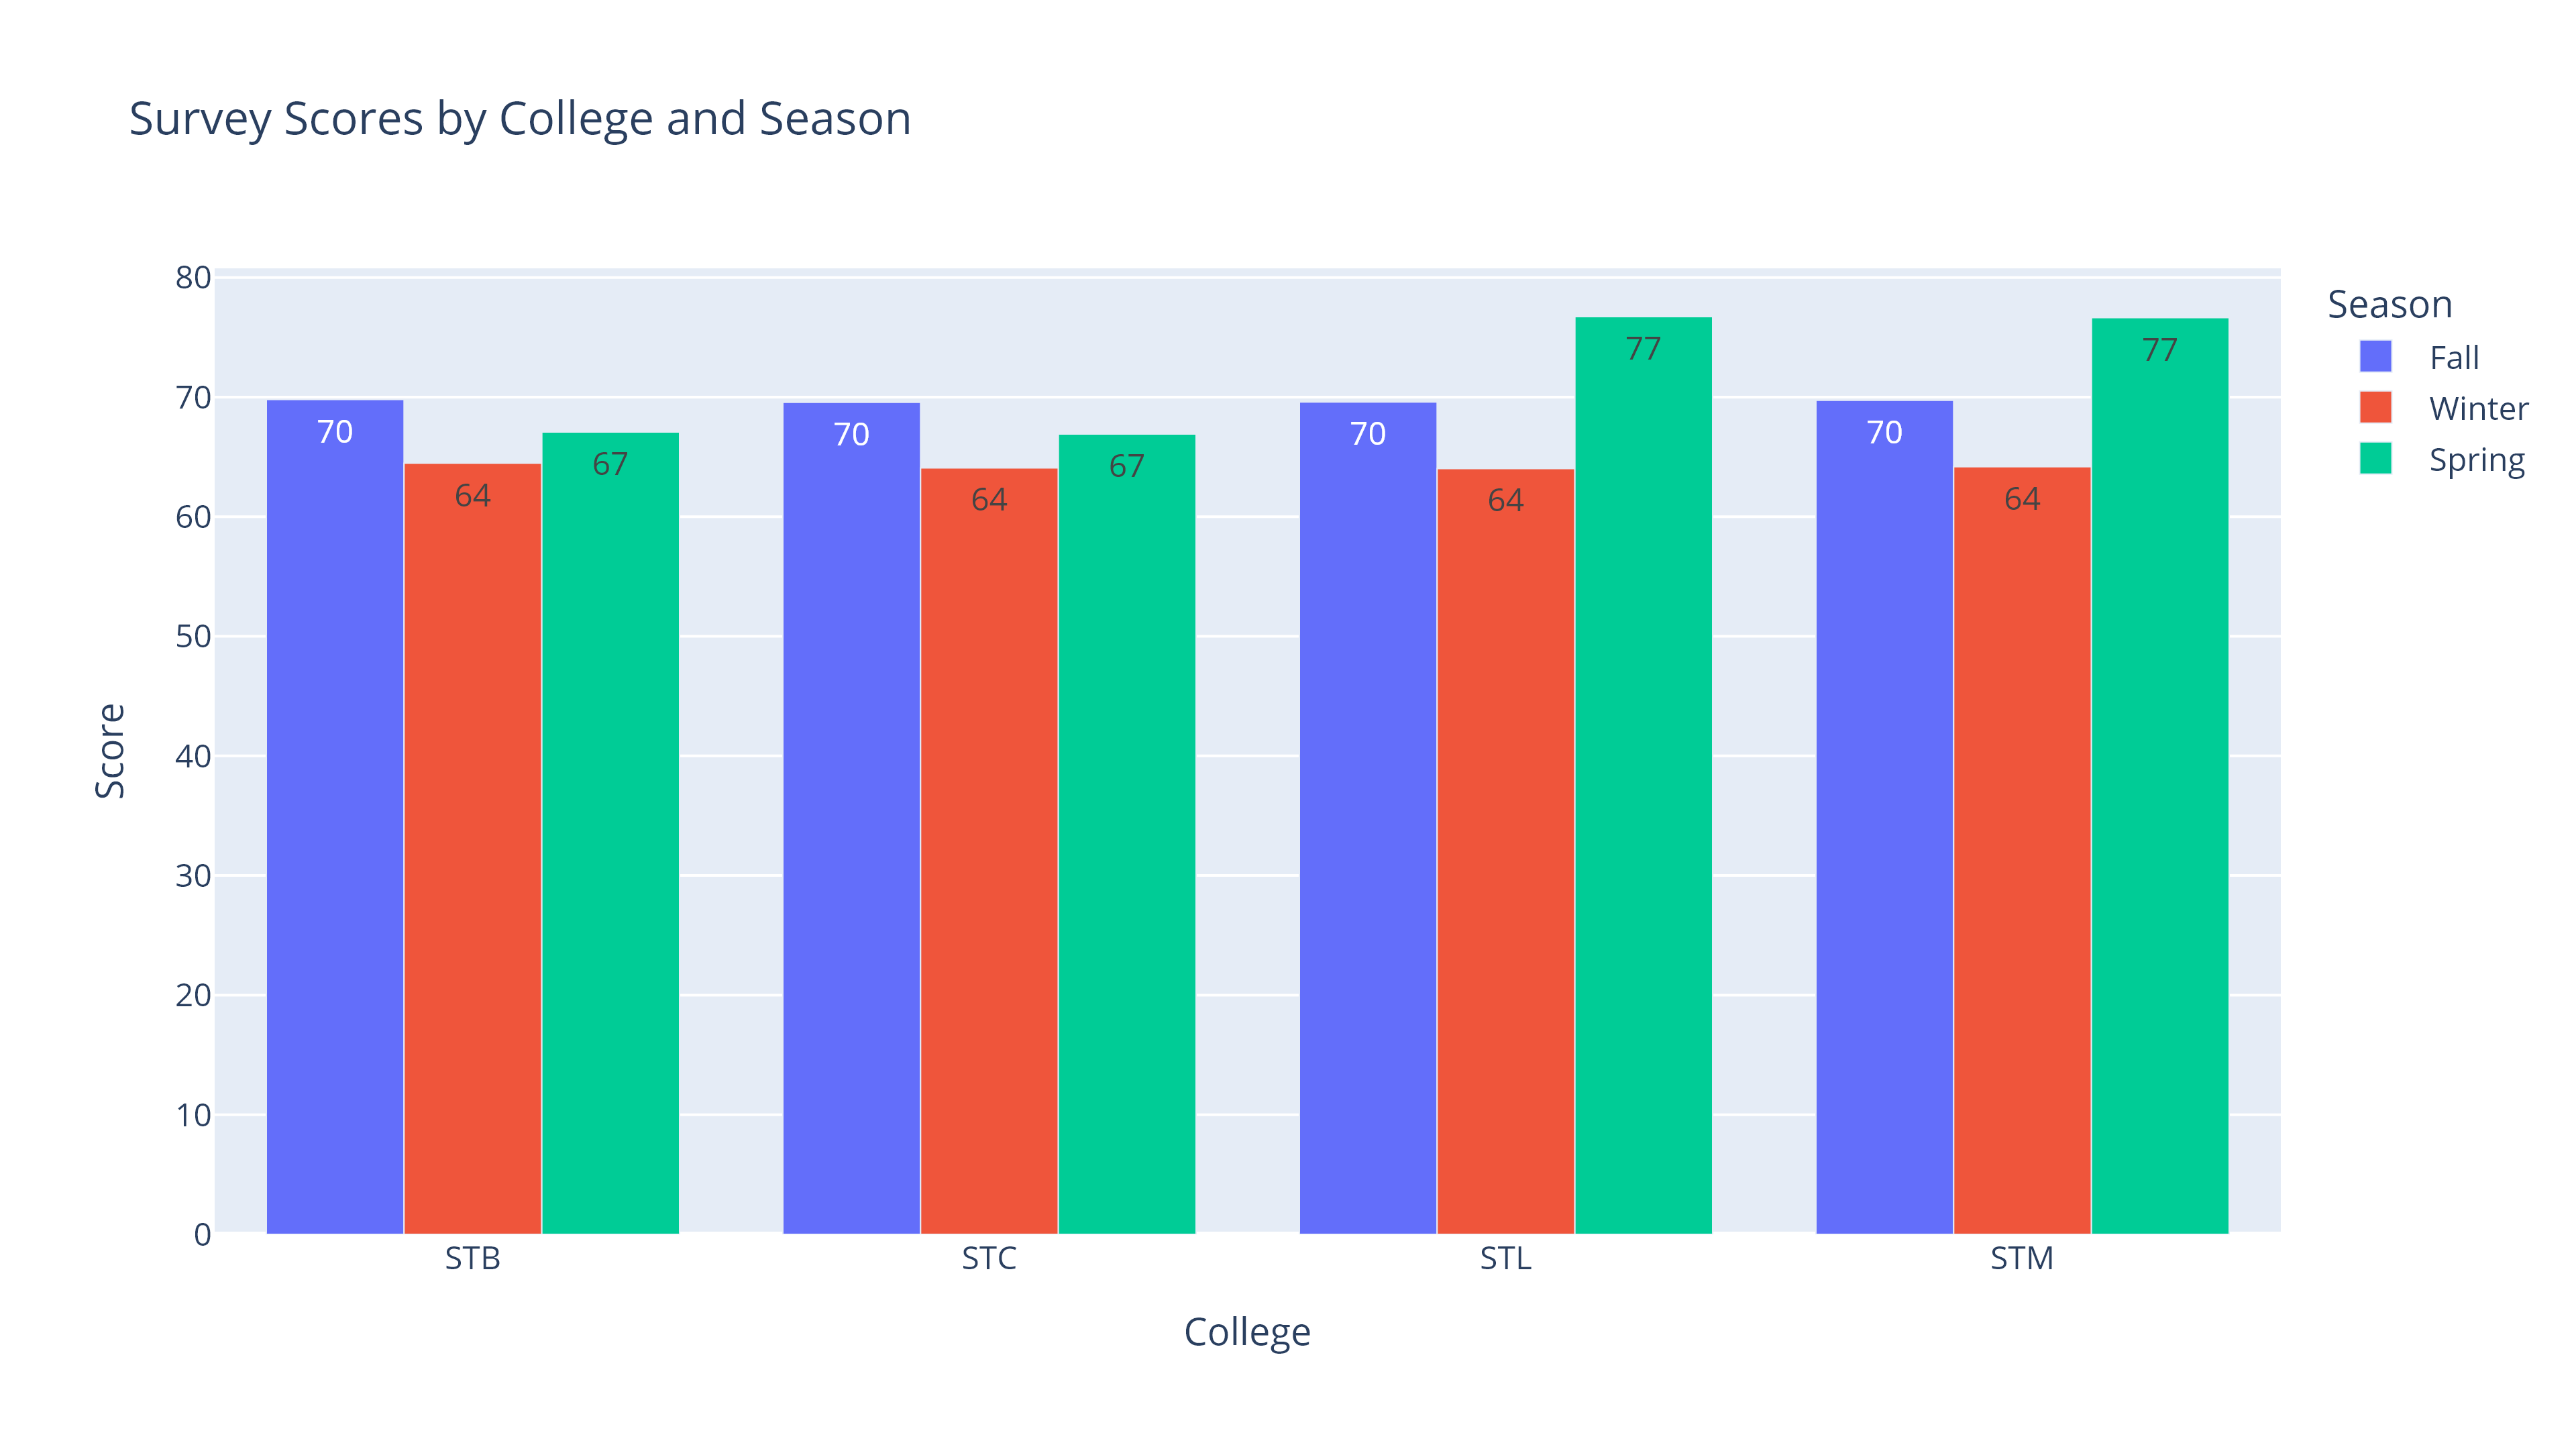

In [16]:
write_html_and_image(fig_survey_results_by_college_and_season_wide,
                     'output/results_by_college_and_season_wide',
                     height = height, width = width, scale = scale)

## Bar charts with 3 or more variables

If you need to differentiate between three different variables (such as college, level, and season), you have two different options. One would be to represent the third variable via Plotly's `pattern_shape` argument, which adds different patterns to bars to represent different variable values; the other would be to group two variables into one via Pandas, then pass that grouped column to the 'x' or 'color' variable. The following code will show each of these two options.

In [17]:
# Reading in a dataset that shows results by school, level, *and* college 
# (hence the use of 'slc' in the DataFrame name):

In [18]:
df_survey_results_slc = pd.read_csv(
    '../Descriptive_Stats/survey_results_slc_long.csv')
df_survey_results_slc.columns = [
    column.title() for column in 
    df_survey_results_slc.columns]
# In order for our graphs to display levels and seasons in the correct
# order, we'll add in a 'Season_For_Sorting' column (an equivalent for levels
# already exists), then sort the DataFrame by these two columns.
# (I'm using this approach rather than the key-based one shown earlier
# because I don't believe that one works with more than one sort value.)
df_survey_results_slc['Season_For_Sorting'] = df_survey_results_slc[
'Season'].map({'Fall':0,'Winter':1,'Spring':2})
df_survey_results_slc.sort_values(['Season_For_Sorting',
                                   'Level_For_Sorting'], inplace = True)
df_survey_results_slc.head()

,Starting_Year,College,Level_For_Sorting,Level,Season,Score,Season_For_Sorting
0,2023,STB,0,Fr,Fall,69.154329,0
12,2023,STC,0,Fr,Fall,70.097292,0
24,2023,STL,0,Fr,Fall,69.026639,0
36,2023,STM,0,Fr,Fall,70.058590,0
3,2023,STB,1,So,Fall,69.950769,0


## Graphing results by college, level, and season:

In [19]:
fig_survey_results_slc_pattern_shape = px.bar(
    df_survey_results_slc, x = 'College', 
    color = 'Season', y = 'Score', pattern_shape = 'Level', barmode = 'group',
    title = 'Survey Scores by College, Season, and Level', text_auto = '.0f')
(fig_survey_results_slc_pattern_shape if show_html_output == True 
 else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

This graph, as shown within the image below, is awfully cluttered and difficult to interpret. Your outcomes with `pattern_shape` might be better if you have, say, only two different values to pass to that argument (e.g. Fall and Spring results), but even then, your visualization may not be very intuitive.

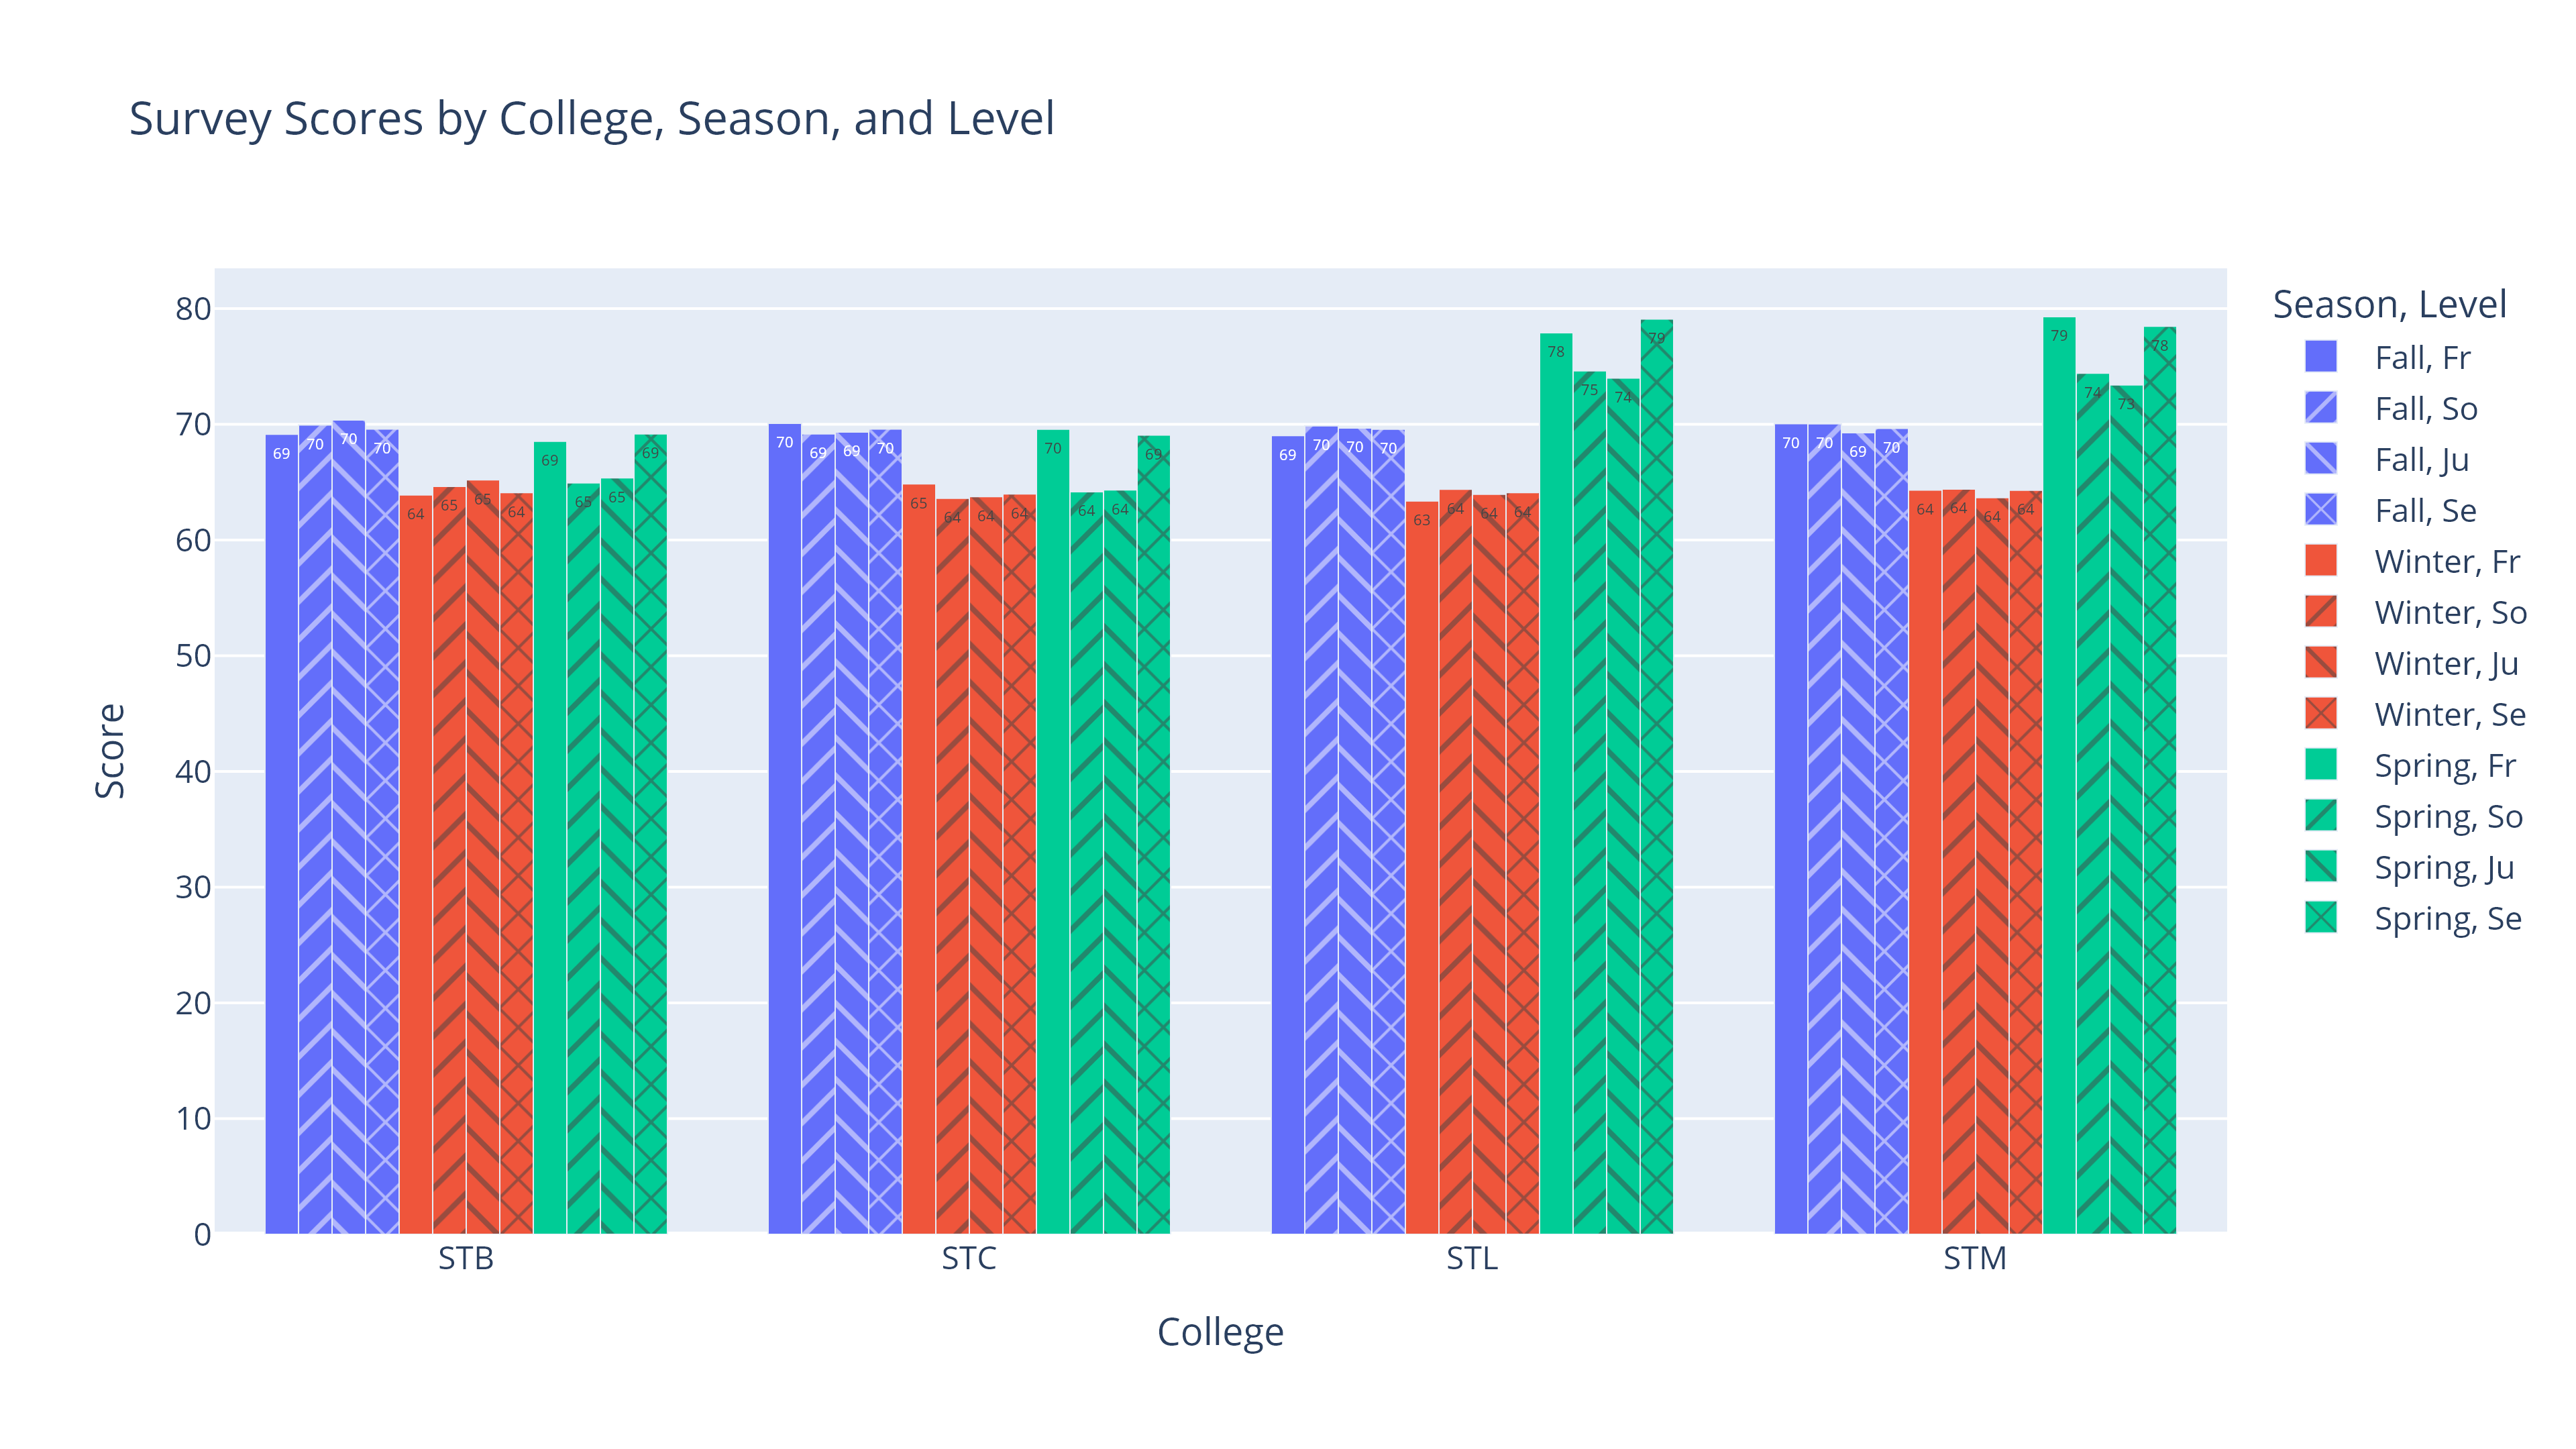

In [20]:
write_html_and_image(fig_survey_results_slc_pattern_shape,
                     'output/results_slc_pattern_shape',
                     height = height, width = width, scale = scale)

Another option is to combine two fields (such as `College` and `Level`) into one, then pass that combined field to our graphing code:

In [21]:
df_survey_results_slc['College and Level'] = (
    df_survey_results_slc['College'] 
    + ' ' + df_survey_results_slc['Level'])
df_survey_results_slc.head()

,Starting_Year,College,Level_For_Sorting,Level,Season,Score,Season_For_Sorting,College and Level
0,2023,STB,0,Fr,Fall,69.154329,0,STB Fr
12,2023,STC,0,Fr,Fall,70.097292,0,STC Fr
24,2023,STL,0,Fr,Fall,69.026639,0,STL Fr
36,2023,STM,0,Fr,Fall,70.058590,0,STM Fr
3,2023,STB,1,So,Fall,69.950769,0,STB So


Now that we've combined College and Level into our `x` variable, we no longer need a `pattern_shape` argument:

In [22]:
fig_survey_results_slc_combined_x = px.bar(
    df_survey_results_slc, x = 'College and Level', 
    color = 'Season', y = 'Score', barmode = 'group',
    title = 'Survey Scores by College, Season, and Level',
text_auto = '.0f')
(fig_survey_results_slc_combined_x if show_html_output == True 
else no_html_output_message)

'To view this HTML output, download the script, set show_html_output to True, and run it offline.'

I find this chart to be somewhat more intuitive, though it's still quite cluttered. Plotly's Box Select feature allows you to zoom in on a specific section of the interactive chart, thus making it somewhat more readable.

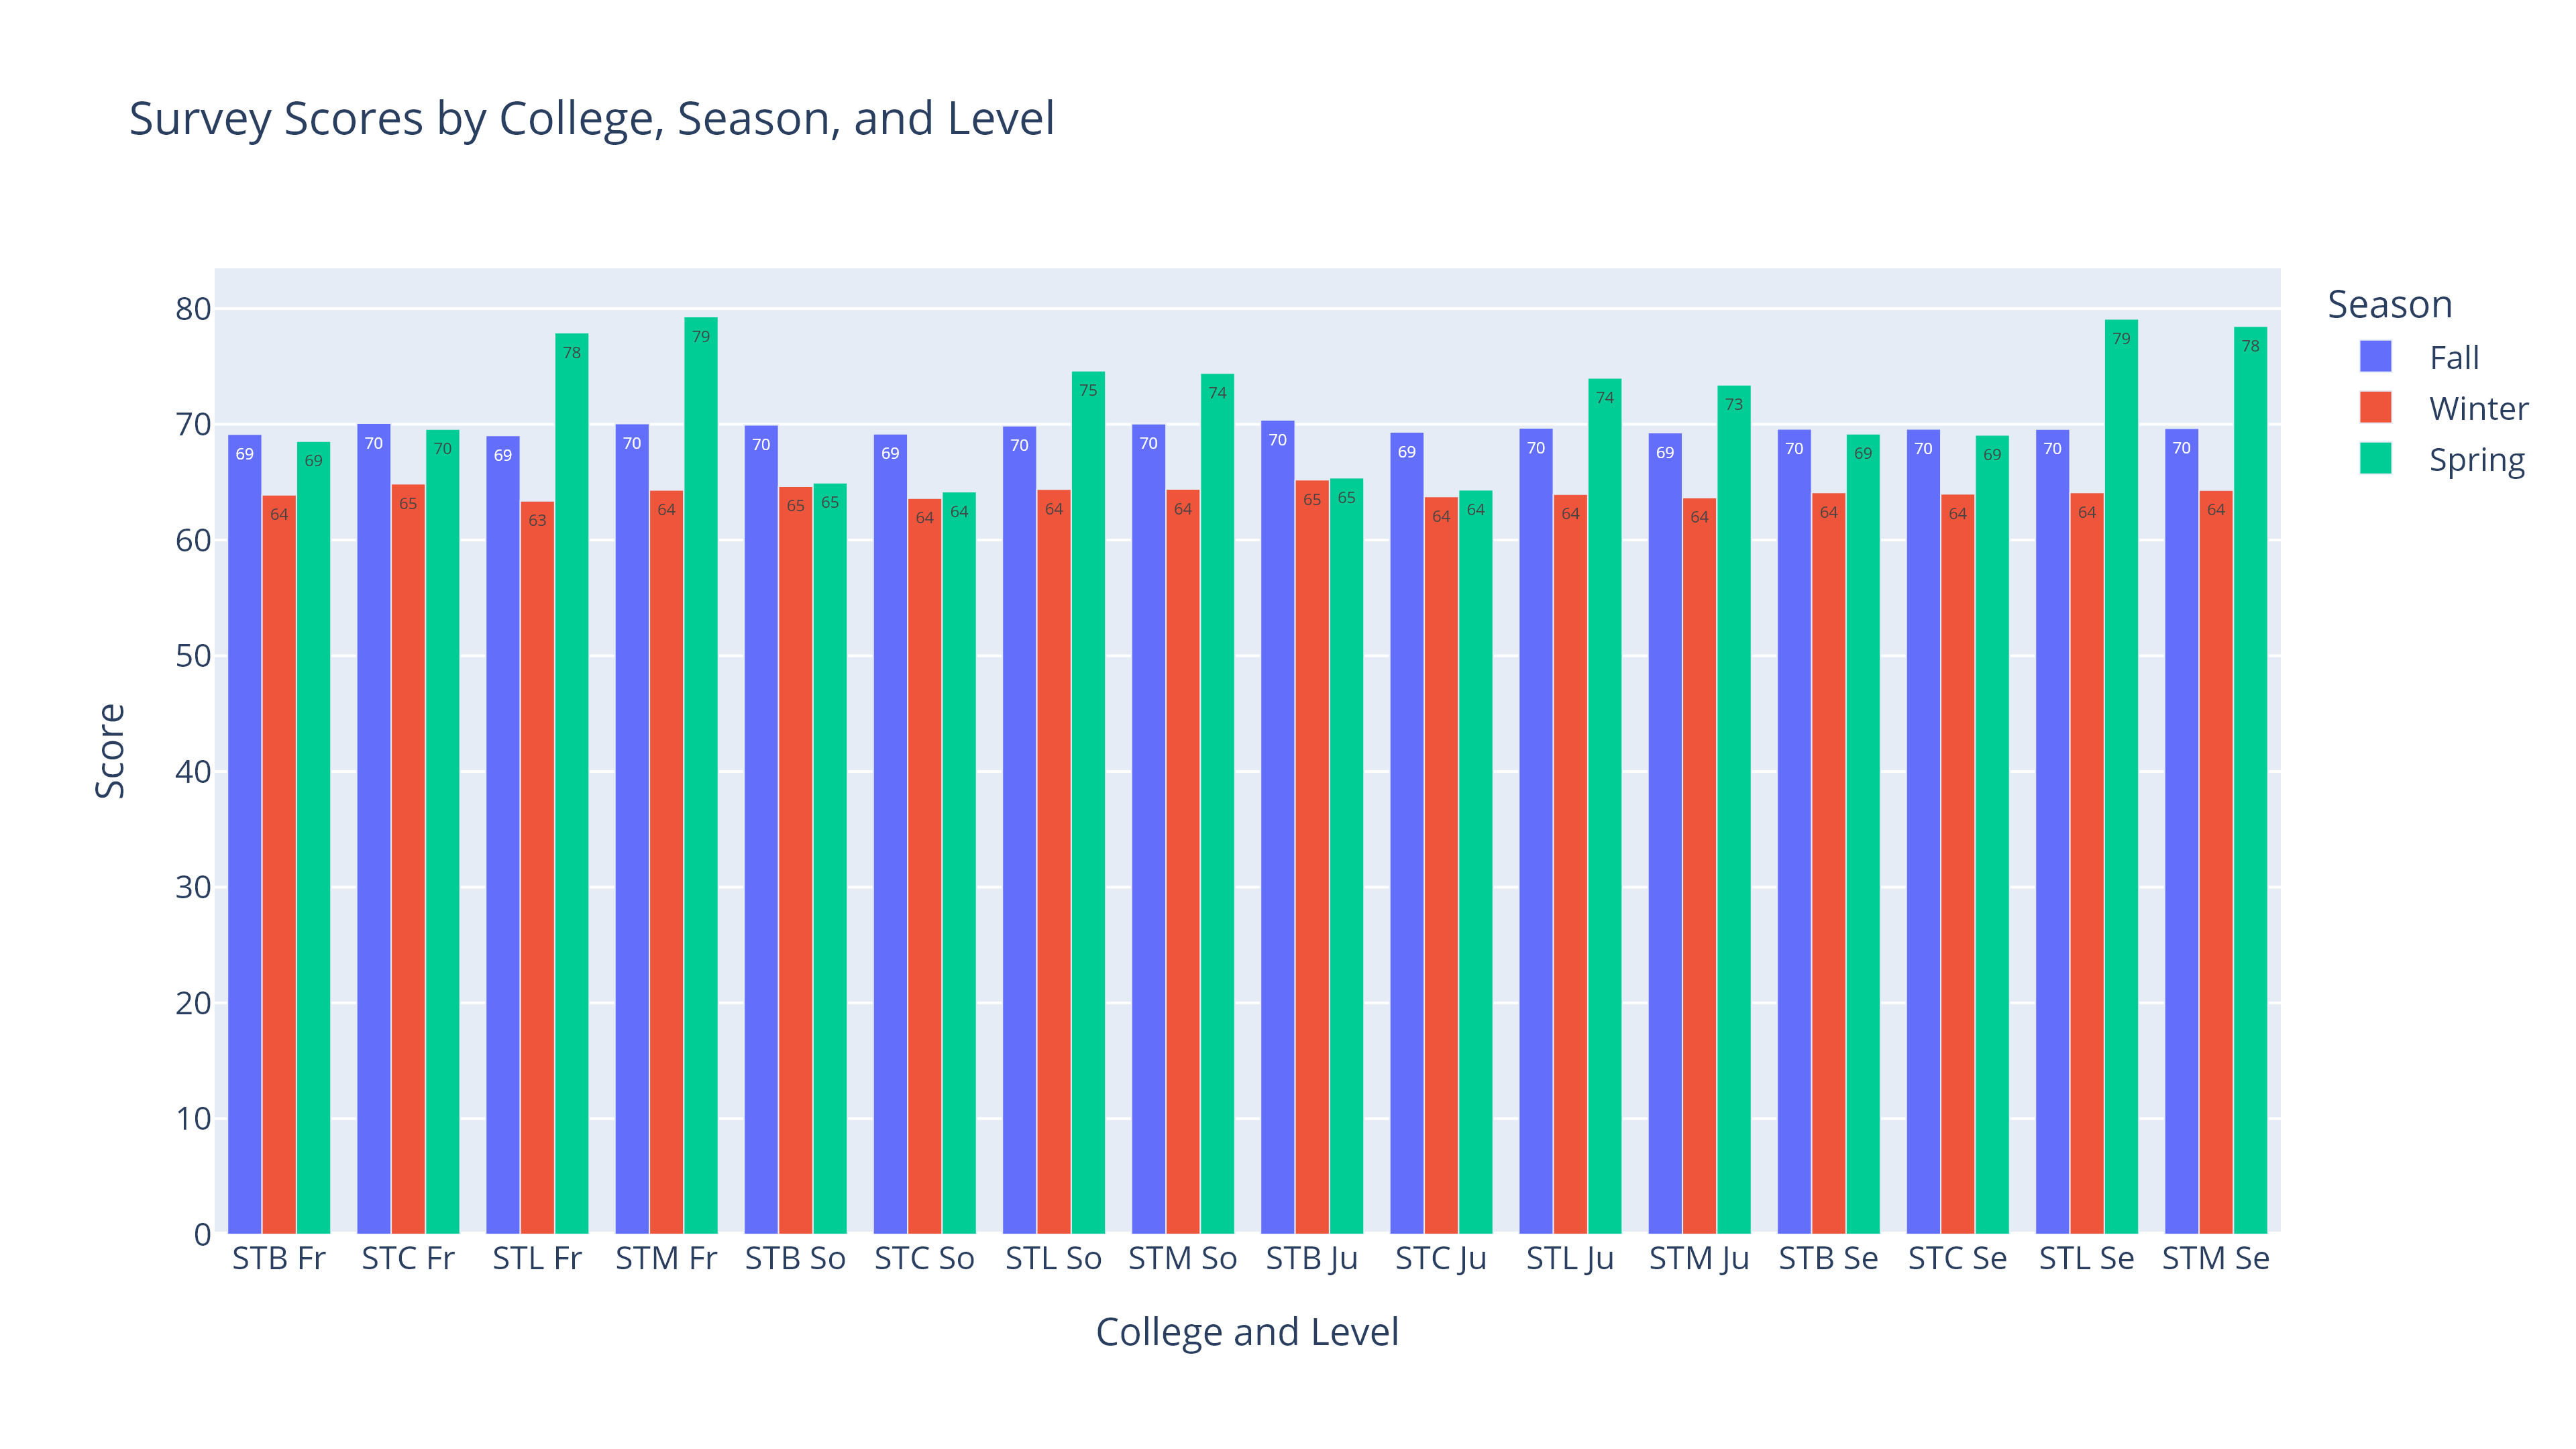

In [23]:
write_html_and_image(fig_survey_results_slc_combined_x,
                     'output/results_slc_combined_x',
                     height = height, width = width, scale = scale)

If you have four or more variables to display, you could combine them via the same method used to generate the 'College and Level' column above. However, you may conclude that limiting your chart to two or three variables is a better option.

# [More to come!]